In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
projectiles =       pd.read_csv(r"..\data\raw\projectiles_tables.tsv",          sep="\t", dtype=str, keep_default_na=False)

In [121]:
damage_counts = projectiles["damage"].value_counts().sort_index()

damage_counts.index.is_monotonic_increasing, damage_counts.index[:15]


(True,
 Index(['', '0', '1', '10', '100', '1000', '105', '11', '110', '112', '115',
        '12', '120', '124', '125'],
       dtype='str', name='damage'))

In [122]:
#problematic tokens (non-int64)
effective_range_text = projectiles["effective_range"].astype(str)

non_integer_mask = ~effective_range_text.str.fullmatch(r"\d+")
effective_range_text[non_integer_mask].value_counts()

effective_range
      1
-1    1
Name: count, dtype: int64

In [123]:
projectiles["effective_range"] = (
    pd.to_numeric(
        projectiles["effective_range"].replace({"": 0, "-1": 0}),
        errors="coerce"
    )
    .fillna(0)
    .astype("int64")
)

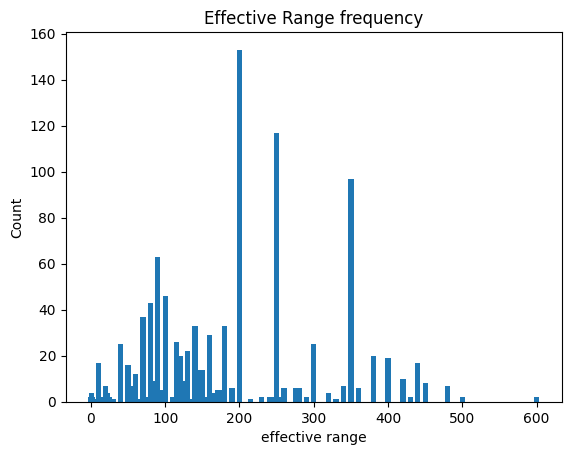

In [124]:
effective_range_counts = projectiles["effective_range"].value_counts().sort_index()

plt.figure()
plt.bar(effective_range_counts.index, effective_range_counts.values, width=7)
plt.title("Effective Range frequency")
plt.xlabel("effective range")
plt.ylabel("Count")
plt.show()

In [125]:
projectiles["damage"] = (
    pd.to_numeric(projectiles["damage"].replace("", np.nan), errors="coerce")
    .astype("Int64")
)

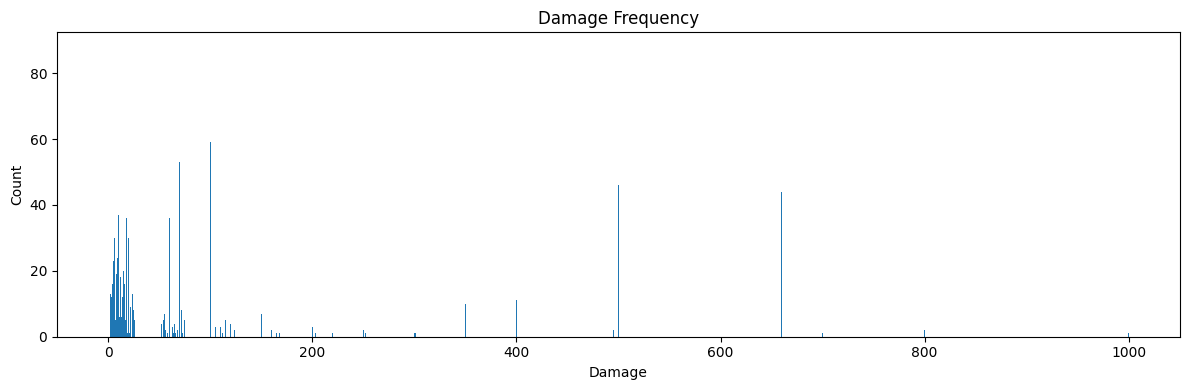

In [126]:
damage_counts = projectiles["damage"].value_counts().sort_index()

plt.figure(figsize=(12,4))
plt.bar(damage_counts.index, damage_counts.values, width=0.5)

# tick_step =  max(1, len(damage_counts)//20)
# plt.xticks(damage_counts.index[::tick_step], rotation=0)

plt.title("Damage Frequency")
plt.xlabel("Damage")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

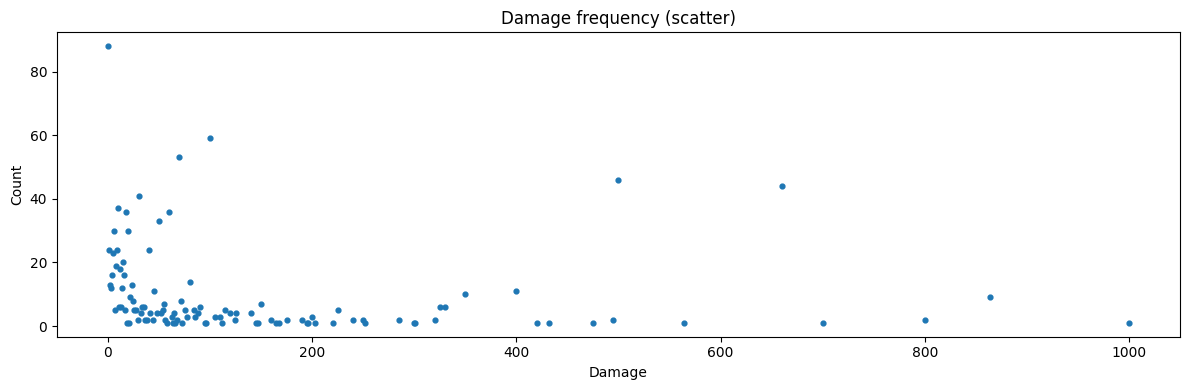

In [127]:
import matplotlib.pyplot as plt

damage_counts = projectiles["damage"].value_counts().sort_index()

plt.figure(figsize=(12,4))
plt.scatter(damage_counts.index, damage_counts.values, s=12)
plt.title("Damage frequency (scatter)")
plt.xlabel("Damage")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


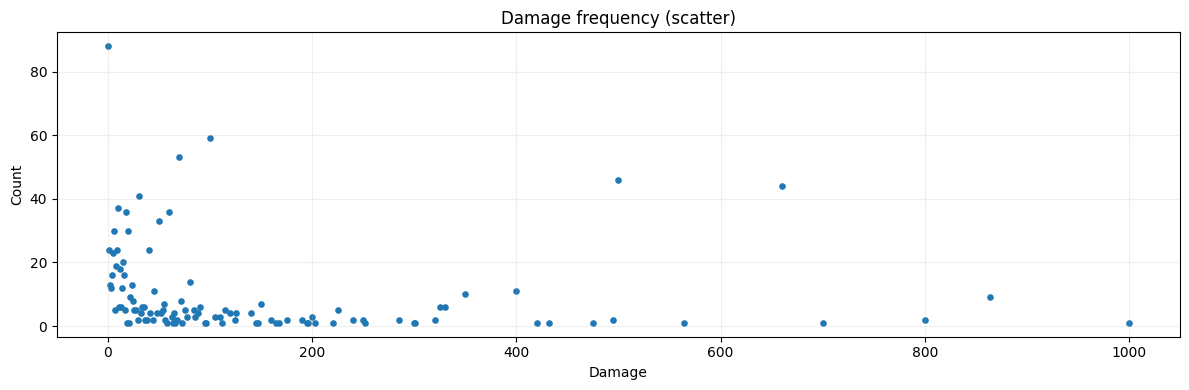

In [128]:
damage_counts = projectiles["damage"].value_counts().sort_index()

plt.figure(figsize=(12,4))
plt.scatter(damage_counts.index, damage_counts.values, s=14)
plt.title("Damage frequency (scatter)")
plt.xlabel("Damage")
plt.ylabel("Count")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


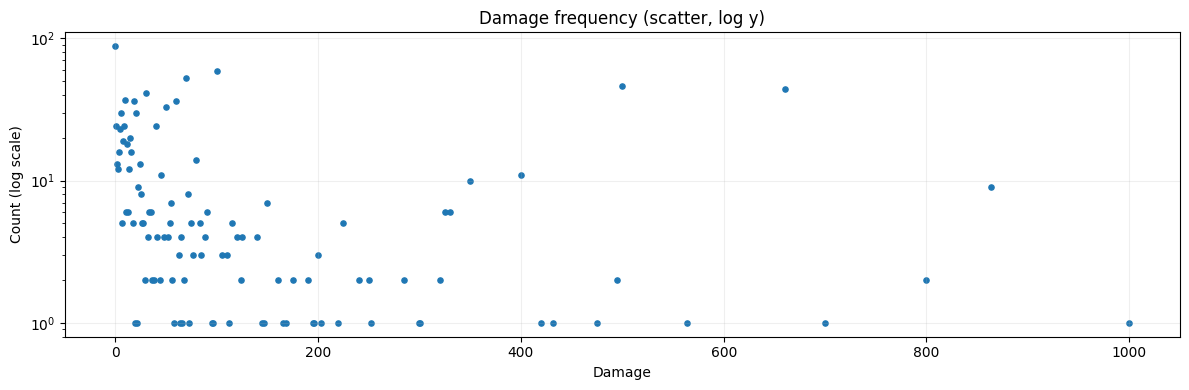

count
1     26
2     16
5      9
4      9
6      7
3      6
24     3
13     2
12     2
16     2
Name: count, dtype: Int64

In [129]:
plt.figure(figsize=(12,4))
plt.scatter(damage_counts.index, damage_counts.values, s=14)
plt.yscale("log")
plt.title("Damage frequency (scatter, log y)")
plt.xlabel("Damage")
plt.ylabel("Count (log scale)")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

damage_counts = projectiles["damage"].value_counts().sort_index()
damage_counts.value_counts().head(10)  # "how many damage values have count=1? count=2? ..."
